In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target Search Term
target_news = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

# Counter
counter = 0

# Lists to hold sentiments
results_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
account_list = []
tweets_ago = []

#Loop through each news
for news in target_news:
    
    #Loop through 100 tweets
    for x in range(5):
        public_tweets = api.user_timeline(news, page = x)
        for tweet in public_tweets:
            if counter % 100 == 0:
                counter = 0
            counter += 1
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            account = (tweet["user"]["name"])

            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            account_list.append(account)
            tweets_ago.append(counter)
   
    
    #Create dataframe of each news
        news_df = pd.DataFrame({
            "News": account_list, 
            "Compound Score": compound_list,
            "Tweets Ago": tweets_ago
        })
    
    
    #Apend dictionary to list
    #results_list.append(news_results)
    
    #print(f"News: {news}")
    #print(f"Compound: {(compound_list)}")

In [5]:
news_df.head()

,News,Compound Score,Tweets Ago
0,BBC,-0.8074,1
1,BBC,0.0000,2
2,BBC,0.0000,3
3,BBC,0.4404,4
4,BBC,0.3612,5


In [6]:
BBC_df = news_df.loc[news_df['News'] == "BBC"].sort_values(by=['Tweets Ago'], ascending=False)
CBS_df = news_df.loc[news_df['News'] == "CBS"].sort_values(by=['Tweets Ago'], ascending=False)
CNN_df = news_df.loc[news_df['News'] == "CNN"].sort_values(by=['Tweets Ago'], ascending=False)
Fox_df = news_df.loc[news_df['News'] == "Fox News"].sort_values(by=['Tweets Ago'], ascending=False)
NYT_df = news_df.loc[news_df['News'] == "The New York Times"].sort_values(by=['Tweets Ago'], ascending=False)

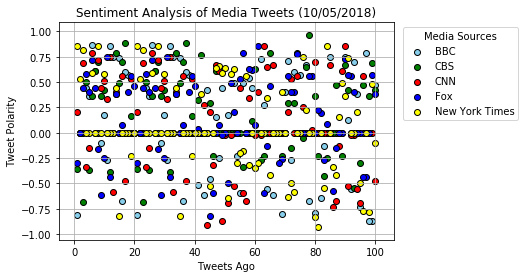

In [7]:
BBC = plt.scatter(CNN_df['Tweets Ago'], BBC_df['Compound Score'], marker="o", facecolors="skyblue", edgecolors="black", label = "BBC")
CBS = plt.scatter(CNN_df['Tweets Ago'], CBS_df['Compound Score'], marker="o", facecolors="green", edgecolors="black", label = "CBS")
CNN = plt.scatter(CNN_df['Tweets Ago'], CNN_df['Compound Score'], marker="o", facecolors="red", edgecolors="black", label = "CNN")
Fox = plt.scatter(CNN_df['Tweets Ago'], Fox_df['Compound Score'], marker="o", facecolors="blue", edgecolors="black", label = "Fox")
NYT = plt.scatter(CNN_df['Tweets Ago'], NYT_df['Compound Score'], marker="o", facecolors="yellow", edgecolors="black", label = "New York Times")

#Set the date of analysis
date_of_analysis = pd.Timestamp("today").strftime("%m/%d/%Y")


plt.title(f"Sentiment Analysis of Media Tweets ({date_of_analysis})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)
plt.legend(handles=[BBC, CBS, CNN, Fox, NYT], title="Media Sources", loc= 9,bbox_to_anchor=(1.2, 1.0))

#Save the figure
plt.savefig("HW7_Sentiment_Analysis.png")

In [8]:
#Export as CSV File
news_df.to_csv("Sentiment_Analysis.csv")